In [2]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using ca

In [34]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')
 

# Data preprocessing
# Replace or drop missing values, convert data types, and encode categorical variables
data = data.dropna()
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Calculate Pearson's correlation coefficients between features and the target variable (Sales)
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Sales']

# Filter out features with low correlation to the target variable
low_correlation_threshold = 0.1  # You can adjust this threshold as needed
relevant_features = correlation_with_target[abs(correlation_with_target) >= low_correlation_threshold].index

# Select the relevant features and the target variable
selected_features = list(relevant_features) + ['Sales']

# Split the data into features and target (sales)
data = data[selected_features]
X = data.drop(columns=['Sales'])
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Benefit per order',
    'Sales per customer',
    'Order Item Discount Rate',
    'Order Item Product Price',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Product Price'
]

# Check if the columns in 'numerical_columns' exist in the DataFrame
for column in numerical_columns:
    if column not in X.columns:
        print(f"Column '{column}' not found in the DataFrame.")

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])




# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep learning model
model = Sequential()

# Embed categorical variables
input_layers = []
for column in categorical_columns:
    num_classes = len(data[column].unique())
    embed_dim = min(num_classes // 2, 50)  # Adjust the embedding dimension as needed
    input_layer = Input(shape=(1,))
    embed_layer = Embedding(input_dim=num_classes, output_dim=embed_dim)(input_layer)
    flatten_layer = Flatten()(embed_layer)
    input_layers.append(input_layer)

# Combine all input layers
input_layer = concatenate(input_layers)
input_layer = concatenate([input_layer, X_train])

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for sales prediction

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Empty DataFrame
Columns: []
Index: []
Column 'Days for shipping (real)' not found in the DataFrame.
Column 'Days for shipment (scheduled)' not found in the DataFrame.
Column 'Benefit per order' not found in the DataFrame.
Column 'Sales per customer' not found in the DataFrame.
Column 'Order Item Discount Rate' not found in the DataFrame.
Column 'Order Item Product Price' not found in the DataFrame.
Column 'Order Item Profit Ratio' not found in the DataFrame.
Column 'Order Item Quantity' not found in the DataFrame.
Column 'Product Price' not found in the DataFrame.


KeyError: "None of [Index(['Days for shipping (real)', 'Days for shipment (scheduled)',\n       'Benefit per order', 'Sales per customer', 'Order Item Discount Rate',\n       'Order Item Product Price', 'Order Item Profit Ratio',\n       'Order Item Quantity', 'Product Price'],\n      dtype='object')] are in the [columns]"

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, concatenate, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Data preprocessing
# Replace or drop missing values, convert data types, and encode categorical variables
data = data.dropna()
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping date (DateOrders)'] = pd.to_datetime(data['shipping date (DateOrders)'])

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Calculate Pearson's correlation coefficients between features and the target variable (Sales)
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Sales']

# Filter out features with low correlation to the target variable
low_correlation_threshold = 0.1  # You can adjust this threshold as needed
relevant_features = correlation_with_target[abs(correlation_with_target) >= low_correlation_threshold].index

# Select the relevant features and the target variable
selected_features = list(relevant_features) + ['Sales']

print(selected_features)

# Split the data into features and target (sales)
data = data[selected_features]
X = data.drop(columns=['Sales'])
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = [
    'Days for shipping (real)',
    'Days for shipment (scheduled)',
    'Benefit per order',
    'Sales per customer',
    'Order Item Discount Rate',
    'Order Item Product Price',
    'Order Item Profit Ratio',
    'Order Item Quantity',
    'Product Price'
]

# Check if the columns in 'numerical_columns' exist in the DataFrame
for column in numerical_columns:
    if column not in X.columns:
        print(f"Column '{column}' not found in the DataFrame.")

X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the deep learning model
model = Sequential()

# Embed categorical variables
input_layers = []
for column in categorical_columns:
    num_classes = len(data[column].unique())
    embed_dim = min(num_classes // 2, 50)  # Adjust the embedding dimension as needed
    input_layer = Input(shape=(1,))
    embed_layer = Embedding(input_dim=num_classes, output_dim=embed_dim)(input_layer)
    flatten_layer = Flatten()(embed_layer)
    input_layers.append(input_layer)

# Combine all input layers
input_layer = concatenate(input_layers)
combined_input = concatenate([input_layer, X_train])

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for sales prediction

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(combined_input, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


['Sales']
Column 'Days for shipping (real)' not found in the DataFrame.
Column 'Days for shipment (scheduled)' not found in the DataFrame.
Column 'Benefit per order' not found in the DataFrame.
Column 'Sales per customer' not found in the DataFrame.
Column 'Order Item Discount Rate' not found in the DataFrame.
Column 'Order Item Product Price' not found in the DataFrame.
Column 'Order Item Profit Ratio' not found in the DataFrame.
Column 'Order Item Quantity' not found in the DataFrame.
Column 'Product Price' not found in the DataFrame.


KeyError: "None of [Index(['Days for shipping (real)', 'Days for shipment (scheduled)',\n       'Benefit per order', 'Sales per customer', 'Order Item Discount Rate',\n       'Order Item Product Price', 'Order Item Profit Ratio',\n       'Order Item Quantity', 'Product Price'],\n      dtype='object')] are in the [columns]"

In [15]:
#Nafees
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Load your dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns
selected_columns = [
    'Customer City', 'Customer State', 'Latitude', 'Longitude', 'Market',
    'order date (DateOrders)', 'Days for shipping (real)', 'Late_delivery_risk',
    'Sales'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features (e.g., Customer City, Customer State)
categorical_columns = ['Customer City', 'Customer State', 'Market']
for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 5  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Customer State', 'Longitude', 'Market', 'Days for shipping (real)',
       'Late_delivery_risk'],
      dtype='object')


In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode','Sales'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]

for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 8  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_feature_names)


Selected Features:
Index(['Category Name', 'Customer City', 'Department Name', 'Market',
       'Order City', 'Order Region', 'Order State', 'Shipping Mode'],
      dtype='object')


Selected Features:
Index(['Category Name', 'Customer City', 'Department Name', 'Market',
       'Order City', 'Order Region', 'Order State', 'Shipping Mode'],
      dtype='object')
Mean Squared Error (MSE): 15287.75026636381
R-squared (R²): 0.1419206664452658
Mean Absolute Error (MAE): 80.92272822488168


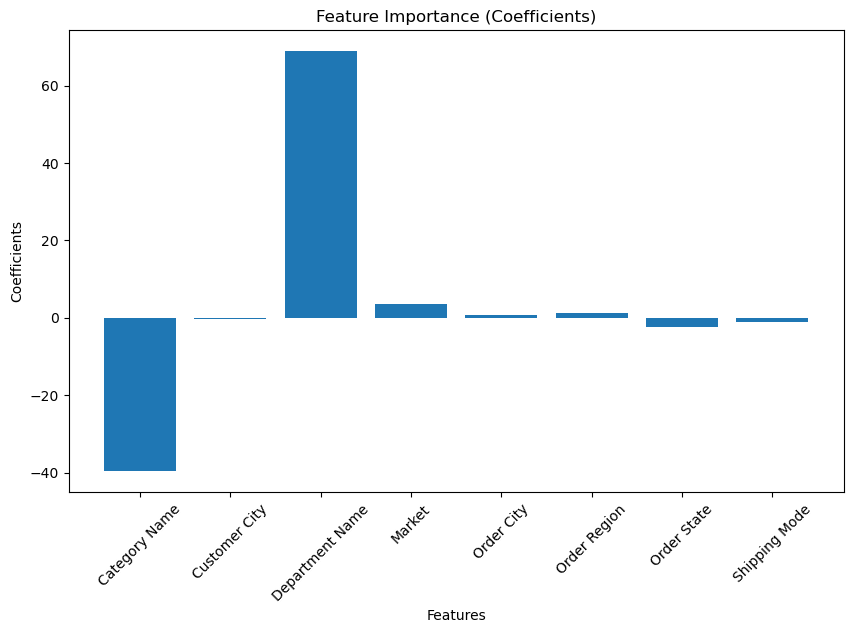

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode', 'Sales'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]

for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 8  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on the selected features
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Visualize feature importance (coefficients)
coef = regressor.coef_
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, coef)
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


Selected Features:
Index(['Type', 'Customer City', 'Customer Country', 'Customer Segment',
       'Order Country', 'Order State', 'Order Status',
       'Days for shipping (real)'],
      dtype='object')
Mean Squared Error (MSE): 60.89378433447983
R-squared (R²): 0.2925321104695493
Mean Absolute Error (MAE): 4.999507233538374


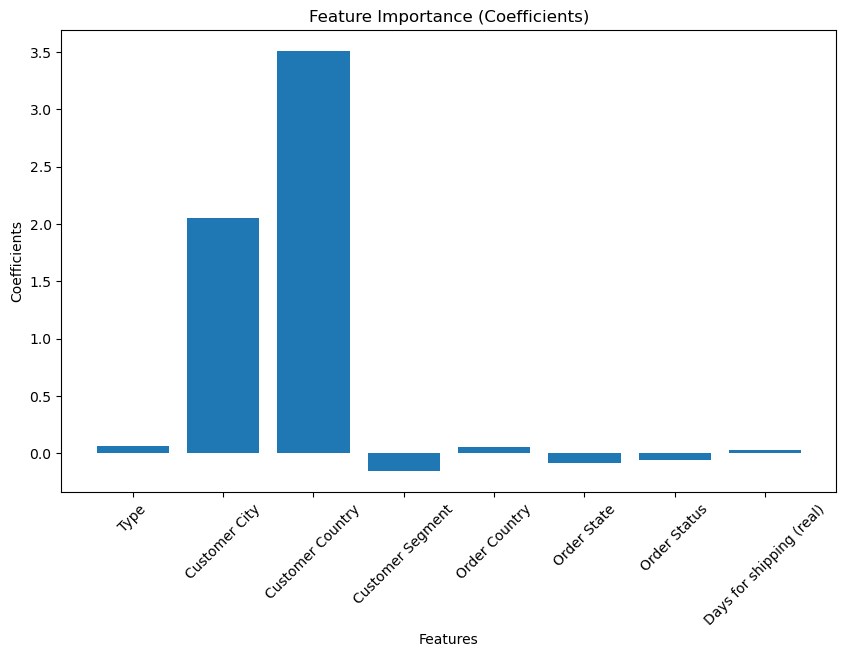

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns (including additional columns)
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode', 'Sales', 'Days for shipping (real)'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]

for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Customer State', axis=1)
y = data['Customer State']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 8  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on the selected features
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Visualize feature importance (coefficients)
coef = regressor.coef_
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, coef)
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


In [29]:
# Calculate the correlation between features and the target variable 'Customer State'
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Customer State'].sort_values(ascending=False)

# Display the features with the highest positive and negative correlations
print("Top positive correlations with 'Customer State':")
print(correlation_with_target.head(5))

print("\nTop negative correlations with 'Customer State':")
print(correlation_with_target.tail(5))


Top positive correlations with 'Customer State':
Customer State              1.000000
Customer Country            0.512026
Customer City               0.448569
Order Country               0.005934
Days for shipping (real)    0.004638
Name: Customer State, dtype: float64

Top negative correlations with 'Customer State':
order date (DateOrders)   -0.002461
Order Status              -0.003029
Order State               -0.003842
Order City                -0.004513
Customer Segment          -0.017273
Name: Customer State, dtype: float64


In [31]:
pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   ------------ --------------------------- 143.4/447.3 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 447.3/447.3 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install --upgrade shap tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns (including additional columns)
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode', 'Sales', 'Days for shipping (real)'
]
data = data[selected_columns]

# Convert 'Customer State' to strings
data['Customer State'] = data['Customer State'].astype(str)

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features using one-hot encoding
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Split the data into features and target
X = data.drop('Customer State', axis=1)
y = data['Customer State']

# Convert 'Customer State' to numerical format (assuming it's a classification task)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a logistic regression model for classification
classifier = LogisticRegression(max_iter=1000, random_state=42)  # You can adjust parameters as needed

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# Assuming classification task, adjust scoring function accordingly
selector = SelectKBest(score_func=f_classif, k=100)  # Select top 100 features
X_selected = selector.fit_transform(X_scaled, y_encoded)

# RFE feature selection
num_selected_features = 8
rfe = RFE(classifier, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_selected, y_encoded)


# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_feature_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y_encoded, test_size=0.2, random_state=42)

# Train the model on the selected features
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize feature importance (coefficients)
coef = classifier.coef_
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, coef[0])
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()


MemoryError: Unable to allocate 7.42 GiB for an array with shape (5518, 180519) and data type float64

Mean Squared Error (MSE): 14938.673200507803
R-squared (R²): 0.1385320160733694
Mean Absolute Error (MAE): 80.60074432564076


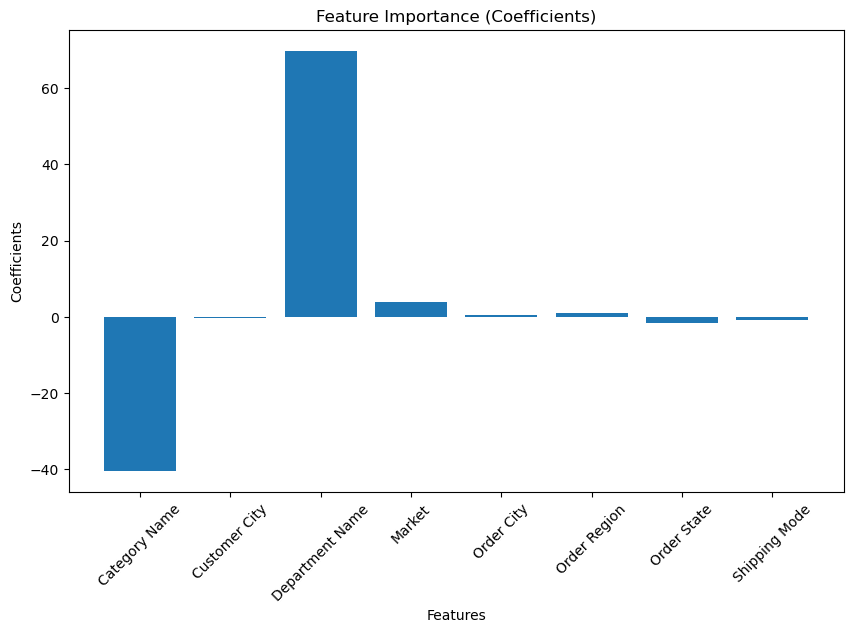

Epoch 1/50
3611/3611 [==============================] - 7s 2ms/step - loss: 21680.9492 - val_loss: 15065.9160
Epoch 2/50
3611/3611 [==============================] - 7s 2ms/step - loss: 18132.5371 - val_loss: 14871.6396
Epoch 3/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17985.0352 - val_loss: 14784.0498
Epoch 4/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17748.6484 - val_loss: 14690.1504
Epoch 5/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17684.2852 - val_loss: 14748.3203
Epoch 6/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17524.9258 - val_loss: 14686.2441
Epoch 7/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17400.4180 - val_loss: 14686.2324
Epoch 8/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17305.2207 - val_loss: 14492.8965
Epoch 9/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17183.1230 - val_loss: 14676.0020
Epoch 10/5

D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


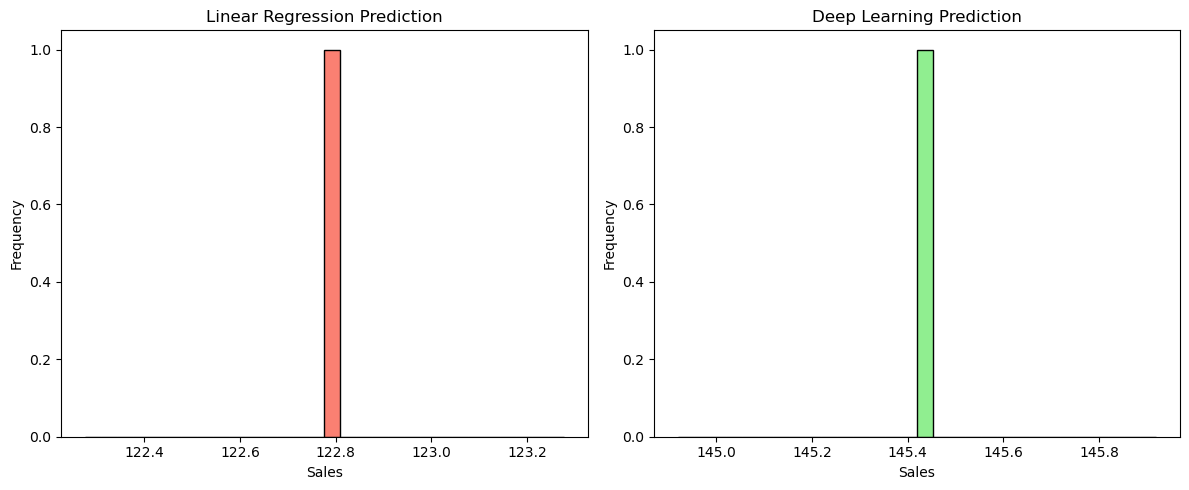


Sales Predictions:
Linear Regression Prediction: $122.78
Deep Learning Prediction: $145.42


In [33]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode', 'Sales'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]

for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 8  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on the selected features
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²):", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Visualize feature importance (coefficients)
coef = regressor.coef_
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, coef)
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Deep Learning Model with only the most relevant features
model = Sequential()
model.add(Dense(64, input_dim=num_selected_features, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_deep_learning = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_deep_learning = mean_squared_error(y_test, y_pred_deep_learning)
print("Deep Learning Mean Squared Error (MSE):", mse_deep_learning)

# Calculate R-squared (R²)
r2_deep_learning = r2_score(y_test, y_pred_deep_learning)
print("Deep Learning R-squared (R²):", r2_deep_learning)

# Calculate Mean Absolute Error (MAE)
mae_deep_learning = mean_absolute_error(y_test, y_pred_deep_learning)
print("Deep Learning Mean Absolute Error (MAE):", mae_deep_learning)


# Manually input user data for prediction
user_input = {
    'Type': 'TRANSFER',
    'Delivery Status': 'Late delivery',
    'Late_delivery_risk': 0,
    'Category Name': 'Shop By Sport',
    'Customer City': 'Caguas',
    'Customer Country': 'Puerto Rico',
    'Customer Segment': 'Corporate',
    'Customer State': 'NY',
    'Department Name': 'Office Supplies',
    'Market': 'USCA',
    'order date (DateOrders)': '2022-01-01',
    'Order City': 'Caguas',
    'Order Country': 'Puerto Rico',
    'Order Region': 'Central America',
    'Order State': 'Rajastán',
    'Order Status': 'SUSPECTED_FRAUD',
    'Shipping Mode': 'Standard Class'
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input])

# Convert the 'order date (DateOrders)' feature to datetime
user_input_df['order date (DateOrders)'] = pd.to_datetime(user_input_df['order date (DateOrders)'])

# Get the minimum date from the training data
min_date = X_scaled['order date (DateOrders)'].min()

# Get the minimum date from the training data
min_date = X_scaled['order date (DateOrders)'].min()

# Assuming X_scaled is your original DataFrame with a 'order date (DateOrders)' column

# Convert 'order date (DateOrders)' to datetime
X_scaled['order date (DateOrders)'] = pd.to_datetime(X_scaled['order date (DateOrders)'])

# Get the minimum date from the 'order date (DateOrders)' column
min_date = X_scaled['order date (DateOrders)'].min()

# Convert 'order date (DateOrders)' to numerical
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - min_date).dt.total_seconds() / (24 * 60 * 60)

# Convert the result to int
X_scaled['order date (DateOrders)'] = X_scaled['order date (DateOrders)'].astype(int)


# Convert categorical features to numerical
for col in categorical_columns:
    user_input_df[col] = pd.factorize(user_input_df[col])[0]

# Scale numerical features using the same scaler used in training
user_input_numeric = user_input_df.select_dtypes(include=['float64', 'int64'])
user_input_scaled_numeric = scaler.transform(user_input_numeric)

# Create a DataFrame with scaled numerical features
user_input_scaled = user_input_df.copy()
user_input_scaled[user_input_numeric.columns] = user_input_scaled_numeric

# Take only the selected features
user_input_rfe = user_input_scaled[selected_feature_names]


# Make predictions using the linear regression model
linear_regression_prediction = regressor.predict(user_input_rfe)[0]

# Make predictions using the deep learning model
deep_learning_prediction = model.predict(user_input_rfe)[0][0]

# Visualize predictions
plt.figure(figsize=(12, 5))

# Histogram of linear regression predictions
plt.subplot(1, 2, 1)
plt.hist(linear_regression_prediction, bins=30, color='salmon', edgecolor='black')
plt.title('Linear Regression Prediction')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram of deep learning predictions
plt.subplot(1, 2, 2)
plt.hist(deep_learning_prediction, bins=30, color='lightgreen', edgecolor='black')
plt.title('Deep Learning Prediction')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display sales predictions
print("\nSales Predictions:")
print(f"Linear Regression Prediction: ${linear_regression_prediction:.2f}")
print(f"Deep Learning Prediction: ${deep_learning_prediction:.2f}")


Mean Squared Error (MSE) - Linear Regression: 14938.673200507803
R-squared (R²) - Linear Regression: 0.1385320160733694
Mean Absolute Error (MAE) - Linear Regression: 80.60074432564076


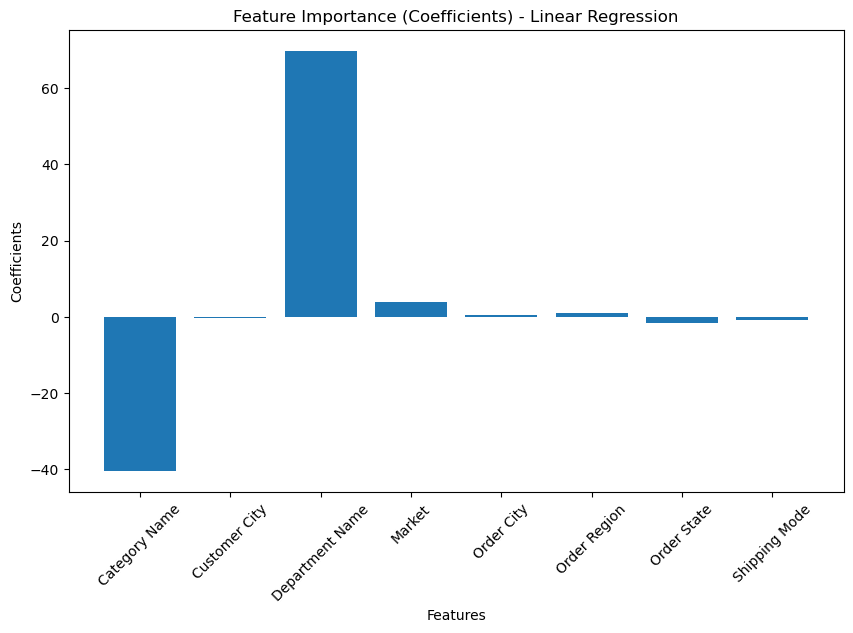

Epoch 1/50
3611/3611 [==============================] - 7s 2ms/step - loss: 21091.4824 - val_loss: 14990.5928
Epoch 2/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17920.9355 - val_loss: 14898.4316
Epoch 3/50
3611/3611 [==============================] - 6s 2ms/step - loss: 17697.4023 - val_loss: 14687.9531
Epoch 4/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17489.5977 - val_loss: 14614.9385
Epoch 5/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17420.1191 - val_loss: 14690.3604
Epoch 6/50
3611/3611 [==============================] - 7s 2ms/step - loss: 17271.5586 - val_loss: 14537.9277
Epoch 7/50
3611/3611 [==============================] - 8s 2ms/step - loss: 17138.1680 - val_loss: 14522.1406
Epoch 8/50
3611/3611 [==============================] - 8s 2ms/step - loss: 17015.1387 - val_loss: 14467.0332
Epoch 9/50
3611/3611 [==============================] - 7s 2ms/step - loss: 16828.3203 - val_loss: 14215.9434
Epoch 10/5

D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


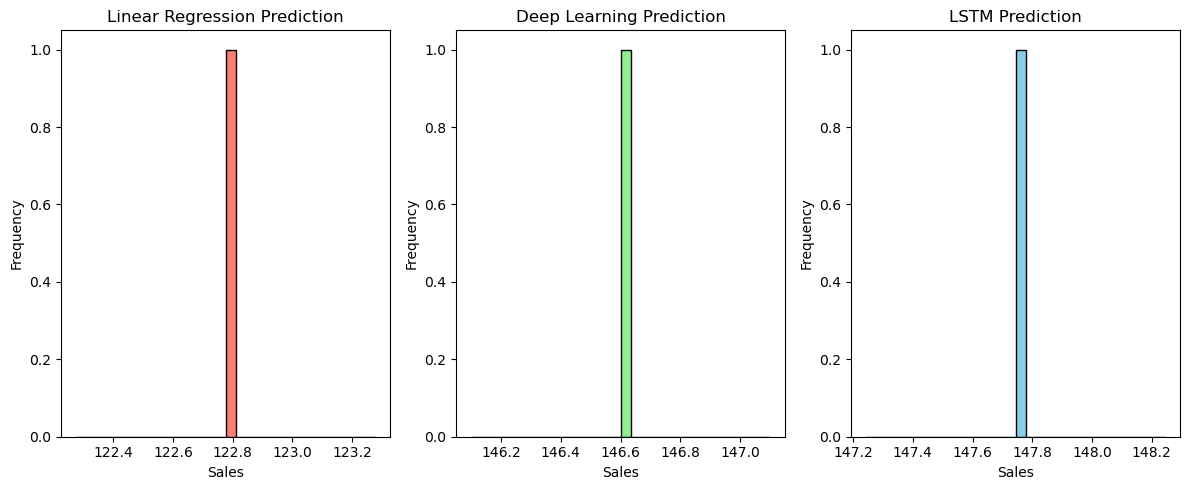


Sales Predictions:
Linear Regression Prediction: $122.78
Deep Learning Prediction: $146.60
LSTM Prediction: $147.74


In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode', 'Sales'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]

for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 8  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on the selected features
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) - Linear Regression:", mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) - Linear Regression:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) - Linear Regression:", mae)

# Visualize feature importance (coefficients)
coef = regressor.coef_
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, coef)
plt.title("Feature Importance (Coefficients) - Linear Regression")
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Deep Learning Model with only the most relevant features
model = Sequential()
model.add(Dense(64, input_dim=num_selected_features, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_deep_learning = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_deep_learning = mean_squared_error(y_test, y_pred_deep_learning)
print("Mean Squared Error (MSE) - Deep Learning:", mse_deep_learning)

# Calculate R-squared (R²)
r2_deep_learning = r2_score(y_test, y_pred_deep_learning)
print("R-squared (R²) - Deep Learning:", r2_deep_learning)

# Calculate Mean Absolute Error (MAE)
mae_deep_learning = mean_absolute_error(y_test, y_pred_deep_learning)
print("Mean Absolute Error (MAE) - Deep Learning:", mae_deep_learning)

# LSTM model
num_timesteps = 1  # You can adjust this based on your data characteristics
X_train_lstm = X_train.reshape((X_train.shape[0], num_timesteps, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], num_timesteps, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(num_timesteps, len(selected_feature_names)), activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='linear'))

# Compile the LSTM model
optimizer_lstm = Adam(learning_rate=0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer_lstm)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Make predictions using the LSTM model
lstm_prediction = lstm_model.predict(X_test_lstm)[0][0]

# Calculate Mean Squared Error (MSE) for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (MSE) - LSTM:", mse_lstm)

# Calculate R-squared (R²) for LSTM
r2_lstm = r2_score(y_test, y_pred_lstm)
print("R-squared (R²) - LSTM:", r2_lstm)

# Calculate Mean Absolute Error (MAE) for LSTM
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print("Mean Absolute Error (MAE) - LSTM:", mae_lstm)

# Manually input user data for prediction
user_input = {
    'Type': 'TRANSFER',
    'Delivery Status': 'Late delivery',
    'Late_delivery_risk': 0,
    'Category Name': 'Shop By Sport',
    'Customer City': 'Caguas',
    'Customer Country': 'Puerto Rico',
    'Customer Segment': 'Corporate',
    'Customer State': 'NY',
    'Department Name': 'Office Supplies',
    'Market': 'USCA',
    'order date (DateOrders)': '2022-01-01',
    'Order City': 'Caguas',
    'Order Country': 'Puerto Rico',
    'Order Region': 'Central America',
    'Order State': 'Rajastán',
    'Order Status': 'SUSPECTED_FRAUD',
    'Shipping Mode': 'Standard Class'
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input])

# Convert the 'order date (DateOrders)' feature to datetime
user_input_df['order date (DateOrders)'] = pd.to_datetime(user_input_df['order date (DateOrders)'])

# Get the minimum date from the training data
min_date = X_scaled['order date (DateOrders)'].min()

# Convert 'order date (DateOrders)' to datetime
X_scaled['order date (DateOrders)'] = pd.to_datetime(X_scaled['order date (DateOrders)'])

# Get the minimum date from the 'order date (DateOrders)' column
min_date = X_scaled['order date (DateOrders)'].min()

# Convert 'order date (DateOrders)' to numerical
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - min_date).dt.total_seconds() / (24 * 60 * 60)

# Convert the result to int
X_scaled['order date (DateOrders)'] = X_scaled['order date (DateOrders)'].astype(int)

# Convert categorical features to numerical
for col in categorical_columns:
    user_input_df[col] = pd.factorize(user_input_df[col])[0]

# Scale numerical features using the same scaler used in training
user_input_numeric = user_input_df.select_dtypes(include=['float64', 'int64'])
user_input_scaled_numeric = scaler.transform(user_input_numeric)

# Create a DataFrame with scaled numerical features
user_input_scaled = user_input_df.copy()
user_input_scaled[user_input_numeric.columns] = user_input_scaled_numeric

# Take only the selected features
user_input_rfe = user_input_scaled[selected_feature_names]

# Reshape user input for LSTM
user_input_lstm = user_input_rfe.values.reshape((1, num_timesteps, len(selected_feature_names)))

# Make predictions using the linear regression model
linear_regression_prediction = regressor.predict(user_input_rfe)[0]

# Make predictions using the deep learning model
deep_learning_prediction = model.predict(user_input_rfe)[0][0]

# Make predictions using the LSTM model
lstm_prediction = lstm_model.predict(user_input_lstm)[0][0]

# Visualize predictions
plt.figure(figsize=(12, 5))

# Histogram of linear regression predictions
plt.subplot(1, 3, 1)
plt.hist(linear_regression_prediction, bins=30, color='salmon', edgecolor='black')
plt.title('Linear Regression Prediction')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram of deep learning predictions
plt.subplot(1, 3, 2)
plt.hist(deep_learning_prediction, bins=30, color='lightgreen', edgecolor='black')
plt.title('Deep Learning Prediction')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram of LSTM predictions
plt.subplot(1, 3, 3)
plt.hist(lstm_prediction, bins=30, color='skyblue', edgecolor='black')
plt.title('LSTM Prediction')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display sales predictions
print("\nSales Predictions:")
print(f"Linear Regression Prediction: ${linear_regression_prediction:.2f}")
print(f"Deep Learning Prediction: ${deep_learning_prediction:.2f}")
print(f"LSTM Prediction: ${lstm_prediction:.2f}")


Epoch 1/50
3611/3611 [==============================] - 15s 4ms/step - loss: 26677.1250 - val_loss: 15280.6299
Epoch 2/50
3611/3611 [==============================] - 14s 4ms/step - loss: 16521.5664 - val_loss: 13751.1279
Epoch 3/50
3611/3611 [==============================] - 15s 4ms/step - loss: 15193.6738 - val_loss: 12734.8252
Epoch 4/50
3611/3611 [==============================] - 15s 4ms/step - loss: 14430.4180 - val_loss: 12142.6016
Epoch 5/50
3611/3611 [==============================] - 15s 4ms/step - loss: 13958.4980 - val_loss: 11900.3066
Epoch 6/50
3611/3611 [==============================] - 15s 4ms/step - loss: 13698.1572 - val_loss: 11749.0273
Epoch 7/50
3611/3611 [==============================] - 15s 4ms/step - loss: 13429.9082 - val_loss: 11614.2559
Epoch 8/50
3611/3611 [==============================] - 15s 4ms/step - loss: 13256.0166 - val_loss: 11499.0234
Epoch 9/50
3611/3611 [==============================] - 15s 4ms/step - loss: 13087.1504 - val_loss: 11359.3799
E

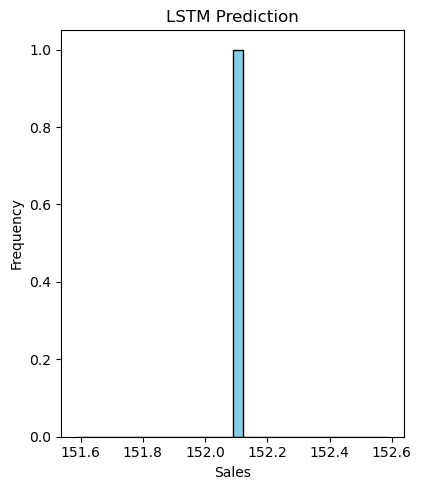


Sales Predictions:
LSTM Prediction: $152.09


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# Dataset
data = pd.read_excel('D:\\Supply Chain Dataset\\DataCoSupplyChainDataset.xlsx')

# Select relevant columns
selected_columns = [
    'Type', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City',
    'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market',
    'order date (DateOrders)', 'Order City', 'Order Country', 'Order Region', 'Order State',
    'Order Status', 'Shipping Mode', 'Sales'
]
data = data[selected_columns]

# Data preprocessing
# Handle missing data, convert categorical features to numerical, etc.

# Encode categorical features
categorical_columns = [
    'Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City',
    'Order Country', 'Order Region', 'Order State', 'Order Status', 'Shipping Mode'
]

for col in categorical_columns:
    data[col] = pd.factorize(data[col])[0]

# Split the data into features and target
X = data.drop('Sales', axis=1)
y = data['Sales']

# Standardize numerical features
scaler = StandardScaler()
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_scaled = X.copy()
X_scaled[X_numeric.columns] = scaler.fit_transform(X_numeric)

# Create a linear regression model
regressor = LinearRegression()

# Convert date-related columns to numerical features
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - X_scaled['order date (DateOrders)'].min()).dt.days

# RFE feature selection
num_selected_features = 8  # Adjust this based on your desired number of features
rfe = RFE(regressor, n_features_to_select=num_selected_features)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get the selected feature names
selected_feature_names = X_scaled.columns[rfe.support_]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Train the model on the selected features
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# LSTM model
num_timesteps = 1  # You can adjust this based on your data characteristics
X_train_lstm = X_train.reshape((X_train.shape[0], num_timesteps, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], num_timesteps, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(num_timesteps, len(selected_feature_names)), activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='linear'))

# Compile the LSTM model
optimizer_lstm = Adam(learning_rate=0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer_lstm)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Make predictions using the LSTM model
lstm_prediction = lstm_model.predict(X_test_lstm)[0][0]

# Calculate Mean Squared Error (MSE) for LSTM
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (MSE) - LSTM:", mse_lstm)

# Calculate R-squared (R²) for LSTM
r2_lstm = r2_score(y_test, y_pred_lstm)
print("R-squared (R²) - LSTM:", r2_lstm)

# Calculate Mean Absolute Error (MAE) for LSTM
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print("Mean Absolute Error (MAE) - LSTM:", mae_lstm)

# Manually input user data for prediction
user_input = {
    'Type': 'TRANSFER',
    'Delivery Status': 'Late delivery',
    'Late_delivery_risk': 0,
    'Category Name': 'Shop By Sport',
    'Customer City': 'Caguas',
    'Customer Country': 'Puerto Rico',
    'Customer Segment': 'Corporate',
    'Customer State': 'NY',
    'Department Name': 'Office Supplies',
    'Market': 'USCA',
    'order date (DateOrders)': '2022-01-01',
    'Order City': 'Caguas',
    'Order Country': 'Puerto Rico',
    'Order Region': 'Central America',
    'Order State': 'Rajastán',
    'Order Status': 'SUSPECTED_FRAUD',
    'Shipping Mode': 'Standard Class'
}

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input])

# Convert the 'order date (DateOrders)' feature to datetime
user_input_df['order date (DateOrders)'] = pd.to_datetime(user_input_df['order date (DateOrders)'])

# Get the minimum date from the training data
min_date = X_scaled['order date (DateOrders)'].min()

# Convert 'order date (DateOrders)' to datetime
X_scaled['order date (DateOrders)'] = pd.to_datetime(X_scaled['order date (DateOrders)'])

# Get the minimum date from the 'order date (DateOrders)' column
min_date = X_scaled['order date (DateOrders)'].min()

# Convert 'order date (DateOrders)' to numerical
X_scaled['order date (DateOrders)'] = (X_scaled['order date (DateOrders)'] - min_date).dt.total_seconds() / (24 * 60 * 60)

# Convert the result to int
X_scaled['order date (DateOrders)'] = X_scaled['order date (DateOrders)'].astype(int)

# Convert categorical features to numerical
for col in categorical_columns:
    user_input_df[col] = pd.factorize(user_input_df[col])[0]

# Scale numerical features using the same scaler used in training
user_input_numeric = user_input_df.select_dtypes(include=['float64', 'int64'])
user_input_scaled_numeric = scaler.transform(user_input_numeric)

# Create a DataFrame with scaled numerical features
user_input_scaled = user_input_df.copy()
user_input_scaled[user_input_numeric.columns] = user_input_scaled_numeric

# Take only the selected features
user_input_rfe = user_input_scaled[selected_feature_names]

# Reshape user input for LSTM
user_input_lstm = user_input_rfe.values.reshape((1, num_timesteps, len(selected_feature_names)))

# Make predictions using the LSTM model
lstm_prediction = lstm_model.predict(user_input_lstm)[0][0]

# Visualize predictions
plt.figure(figsize=(12, 5))


# Histogram of LSTM predictions
plt.subplot(1, 3, 3)
plt.hist(lstm_prediction, bins=30, color='skyblue', edgecolor='black')
plt.title('LSTM Prediction')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display sales predictions
print("\nSales Predictions:")
print(f"LSTM Prediction: ${lstm_prediction:.2f}")
